In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# HEAD(30) 보여주기
N = 30
with open('/Users/seoihwan/Downloads/2023 문화관광 데이터 분석대회_민간데이터/2023년 문화관광 데이터 분석대회(카드데이터_내국인).txt', encoding='utf-8') as myfile:
    head = [next(myfile) for x in range(N)]
print(len(head))
for l in head:
    print(l)

30
자택광역시도|가맹점광역시도|가맹점시군구|GB3|GB2|SEX_CCD|CLN_AGE_R|TA_YM|DAW_CCD_R|APV_TS_DL_TM_R|VLM|USEC

42|42|42830|여행|교통|M|40|202107|RED|활동|18730606|78

28|42|42830|여행|관광쇼핑|F|50|202107|RED|활동|319575|26

28|43|43111|취미오락|외식|F|60|202107|RED|활동|2187119|96

43|43|43111|취미오락|목욕|M|40|202107|RED|활동|1821140|201

43|43|43112|여행|관광쇼핑|F|40|202107|WHITE|활동|100688|17

36|43|43112|취미오락|유흥|F|30|202107|WHITE|활동|43777|8

43|43|43130|취미오락|패션쇼핑|F|60|202107|WHITE|휴식|20862653|297

28|43|43130|스포츠활동|골프|F|60|202107|WHITE|활동|18734108|140

47|43|43150|취미오락|외식|F|40|202107|WHITE|활동|8332593|245

30|43|43150|취미오락|외식|F|40|202107|WHITE|휴식|1091808|61

46|43|43710|취미오락|외식|M|50|202107|WHITE|휴식|169418|26

43|43|43720|취미오락|종교활동|F|40|202107|WHITE|활동|770482|78

43|43|43740|취미오락|종합쇼핑|M|20|202107|WHITE|휴식|2360916|218

43|43|43745|취미오락|미용|M|30|202107|RED|휴식|2171359|113

44|43|43745|취미오락|외식|M|30|202107|WHITE|휴식|9577623|218

27|43|43750|취미오락|외식|M|20|202107|RED|휴식|520075|35

43|43|43750|스포츠활동|레저스포츠|M|50|202107|WHITE|활동|3573112|253

43|43|4

In [2]:
with open('/Users/seoihwan/Downloads/2023 문화관광 데이터 분석대회_민간데이터/2023년 문화관광 데이터 분석대회(카드데이터_내국인).txt', encoding='utf-8') as f:
    column_names = f.readline().strip().split('|')

In [ ]:
import pandas as pd

def read_large_file(filename):
    with open(filename, encoding='utf-8') as f:
        # 첫 번째 줄은 컬럼 이름으로 읽어옴
        column_names = f.readline().strip().split('|')
        
        # 나머지 데이터는 제너레이터로 읽어옴
        for line in f:
            yield line.strip().split('|')

# 제너레이터로부터 데이터프레임 생성
lines_generator = read_large_file('/Users/seoihwan/Downloads/2023 문화관광 데이터 분석대회_민간데이터/2023년 문화관광 데이터 분석대회(카드데이터_내국인).txt')
df = pd.DataFrame(lines_generator, columns=column_names)

In [6]:
df

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,42,42,42830,여행,교통,M,40,202107,RED,활동,18730606,78
1,28,42,42830,여행,관광쇼핑,F,50,202107,RED,활동,319575,26
2,28,43,43111,취미오락,외식,F,60,202107,RED,활동,2187119,96
3,43,43,43111,취미오락,목욕,M,40,202107,RED,활동,1821140,201
4,43,43,43112,여행,관광쇼핑,F,40,202107,WHITE,활동,100688,17
...,...,...,...,...,...,...,...,...,...,...,...,...
36778843,29,44,44133,취미오락,인터넷게임,F,40,202206,WHITE,활동,518579,88
36778844,43,44,44133,취미오락,유흥,M,40,202206,WHITE,취침,790217,9
36778845,43,44,44150,취미오락,교육훈련,F,60,202206,RED,활동,98777,9
36778846,11,44,44200,여행,숙박,M,30,202206,RED,취침,3160868,9


In [4]:
df1 = df.copy()

In [50]:
df1.GB2.unique()

array(['교통', '관광쇼핑', '외식', '목욕', '유흥', '패션쇼핑', '골프', '종교활동', '종합쇼핑', '미용',
       '레저스포츠', '체험', '미술공예참여', '공연관람', '악기연주', '숙박', '인터넷게임', '애완동물돌보기',
       '자전거', '스포츠용품구매', '사진촬영', '교육훈련', '여행사', '독서', '헬스', '운동경기관람',
       '음악감상', '스키'], dtype=object)

In [ ]:
df1['USEC']=df1.USEC.astype('int')
df1['VLM']=df1.VLM.astype('int')

In [52]:
df1[df1.GB2 == '애완동물돌보기']

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
55,11,45,45111,취미오락,애완동물돌보기,M,40,202107,WHITE,활동,1469170,35
102,44,47,47113,취미오락,애완동물돌보기,F,40,202107,WHITE,활동,280175,8
111,27,47,47190,취미오락,애완동물돌보기,F,30,202107,RED,활동,2385869,35
131,48,48,48121,취미오락,애완동물돌보기,M,30,202107,RED,휴식,5218881,96
147,41,48,48250,취미오락,애완동물돌보기,M,30,202107,RED,활동,879050,26
...,...,...,...,...,...,...,...,...,...,...,...,...
36778764,36,30,30200,취미오락,애완동물돌보기,F,60,202206,WHITE,활동,8681521,29
36778791,43,41,41285,취미오락,애완동물돌보기,M,60,202206,WHITE,활동,190639,19
36778795,44,41,41480,취미오락,애완동물돌보기,M,40,202206,RED,활동,228175,9
36778800,43,41,41590,취미오락,애완동물돌보기,M,40,202206,WHITE,활동,97789,9


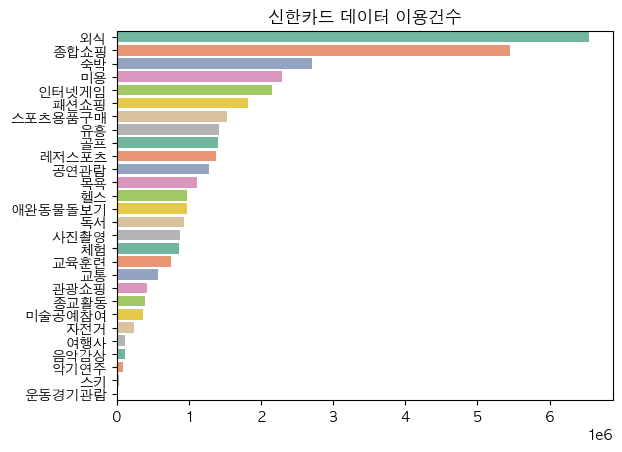

In [57]:
palette = sns.color_palette('Set2')
plt.title('신한카드 데이터 이용건수')
sns.barplot(x=df1.GB2.value_counts(),y=df1.GB2.value_counts().index,palette=palette)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
palette = sns.color_palette('Set2')
plt.title('신한카드 데이터 매출액')
sns.barplot(x=df1.groupby('GB2')['VLM'].sum(),y=df1.groupby('GB2')['VLM'].sum().index,palette=palette)
plt.xlabel('')
plt.ylabel('')
plt.show()

## 여행 데이터로 EDA

In [9]:
df2 = df1[df1.GB3 == '여행']

In [10]:
len(df2)

4681798

In [11]:
df2.to_csv('travel_shinhan.csv',encoding='cp949',index=False)

In [15]:
df2.TA_YM.unique()

array(['202107', '202207', '202007', '202008', '202110', '202108',
       '202208', '202011', '202109', '202112', '202212', '202102',
       '202302', '202205', '202009', '202209', '202010', '202210',
       '202111', '202211', '202012', '202101', '202201', '202301',
       '202202', '202103', '202203', '202104', '202303', '202204',
       '202105', '202304', '202106', '202305', '202206'], dtype=object)

In [17]:
df22 = df2[df2.TA_YM.str.contains('2022')]
df23 = df2[df2.TA_YM.str.contains('2023')]

In [20]:
df_year = pd.concat([df22,df23])

In [21]:
df_trav = df_year[df_year['자택광역시도'] != df_year['가맹점광역시도']]

In [34]:
df_trav.dtypes

자택광역시도            object
가맹점광역시도           object
가맹점시군구            object
GB3               object
GB2               object
SEX_CCD           object
CLN_AGE_R         object
TA_YM             object
DAW_CCD_R         object
APV_TS_DL_TM_R    object
VLM               object
USEC              object
dtype: object

In [36]:
df_trav['USEC']=df_trav.USEC.astype('int')
df_trav['VLM']=df_trav.VLM.astype('int')

/var/folders/qr/778czgkd1p7ch8wn4f6dmdkh0000gn/T/ipykernel_70258/2405653729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trav['USEC']=df_trav.USEC.astype('int')
/var/folders/qr/778czgkd1p7ch8wn4f6dmdkh0000gn/T/ipykernel_70258/2405653729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trav['VLM']=df_trav.VLM.astype('int')


In [22]:
len(df_trav)

2003056

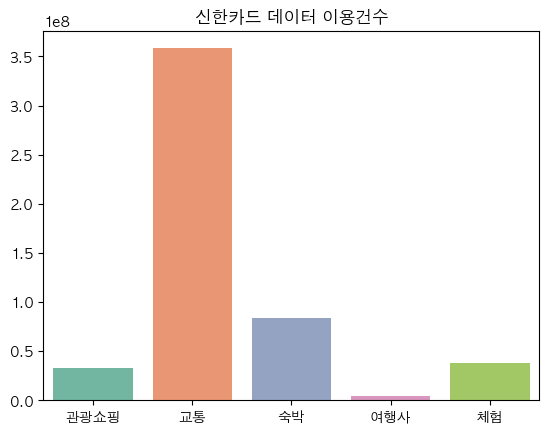

In [47]:
palette = sns.color_palette('Set2')
plt.title('신한카드 데이터 이용건수')
sns.barplot(y=df_trav.groupby('GB2')['USEC'].sum(),x=df_trav.groupby('GB2')['USEC'].sum().index,palette=palette)
plt.xlabel('')
plt.ylabel('')
plt.show()

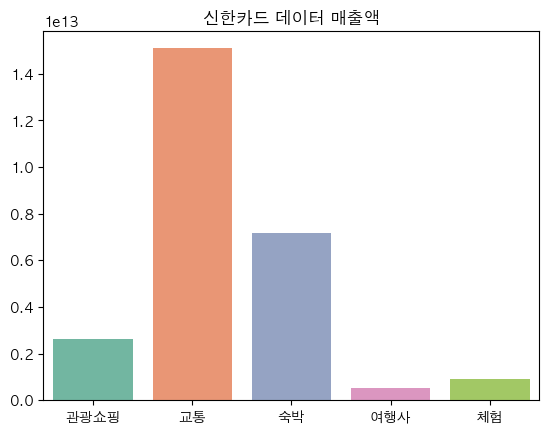

In [48]:
palette = sns.color_palette('Set2')
plt.title('신한카드 데이터 매출액')
sns.barplot(y=df_trav.groupby('GB2')['VLM'].sum(),x=df_trav.groupby('GB2')['VLM'].sum().index,palette=palette)
plt.xlabel('')
plt.ylabel('')
plt.show()

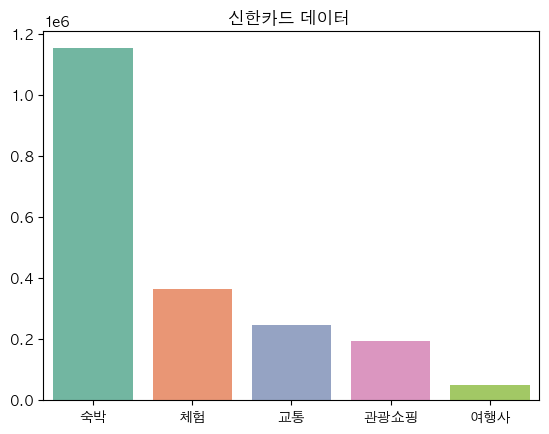

In [49]:
plt.rc('font', family='AppleGothic')
palette = sns.color_palette('Set2')
plt.title('신한카드 데이터 ')
sns.barplot(y=df_trav.GB2.value_counts(),x=df_trav.GB2.value_counts().index,palette=palette)
plt.ylabel('')
plt.show()

## 고려사항
- 거주지와 사용한(가맹점) 곳의 차이를 둘지 말지 why? 이는 근교로 관광쇼핑 하는 것도 여행으로 간주되기 때문

In [12]:
df2.GB2.unique()

array(['교통', '관광쇼핑', '체험', '숙박', '여행사'], dtype=object)

In [ ]:
plt.rc('font', family='AppleGothic')
palette = sns.color_palette('Set2')
gb2 = df1.groupby('GB2')['VLM'].sum().to_frame()
sns.barplot(y=gb2.index,x=gb2.GB2,palette=palette)

In [24]:
df_trav = df1[df1['자택광역시도'] != df1['가맹점광역시도']]
len(df_trav)

30045321

In [ ]:
df_gb2 = df1[df1.GB2.isin(['관광쇼핑','외식','숙박','애완동물돌보기'])]